# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [2]:
# QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat''

## Reading input data

In [4]:
def read_input(link, print_matrices=True):
    qap_instance_file = urllib.request.urlopen(link)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    if print_matrices:
        print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    if print_matrices:
        print('Distance matrix:\n', B)
    return A, B

QAP_INSTANCE_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/nug12.dat'
flow12, distance12 = read_input(QAP_INSTANCE_URL)

Problem size: 12
Flow matrix:
 [[0. 1. 2. 3. 1. 2. 3. 4. 2. 3. 4. 5.]
 [1. 0. 1. 2. 2. 1. 2. 3. 3. 2. 3. 4.]
 [2. 1. 0. 1. 3. 2. 1. 2. 4. 3. 2. 3.]
 [3. 2. 1. 0. 4. 3. 2. 1. 5. 4. 3. 2.]
 [1. 2. 3. 4. 0. 1. 2. 3. 1. 2. 3. 4.]
 [2. 1. 2. 3. 1. 0. 1. 2. 2. 1. 2. 3.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 2. 1. 2.]
 [4. 3. 2. 1. 3. 2. 1. 0. 4. 3. 2. 1.]
 [2. 3. 4. 5. 1. 2. 3. 4. 0. 1. 2. 3.]
 [3. 2. 3. 4. 2. 1. 2. 3. 1. 0. 1. 2.]
 [4. 3. 2. 3. 3. 2. 1. 2. 2. 1. 0. 1.]
 [5. 4. 3. 2. 4. 3. 2. 1. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0.  5.  2.  4.  1.  0.  0.  6.  2.  1.  1.  1.]
 [ 5.  0.  3.  0.  2.  2.  2.  0.  4.  5.  0.  0.]
 [ 2.  3.  0.  0.  0.  0.  0.  5.  5.  2.  2.  2.]
 [ 4.  0.  0.  0.  5.  2.  2. 10.  0.  0.  5.  5.]
 [ 1.  2.  0.  5.  0. 10.  0.  0.  0.  5.  1.  1.]
 [ 0.  2.  0.  2. 10.  0.  5.  1.  1.  5.  4.  0.]
 [ 0.  2.  0.  2.  0.  5.  0. 10.  5.  2.  3.  3.]
 [ 6.  0.  5. 10.  0.  1. 10.  0.  0.  0.  5.  0.]
 [ 2.  4.  5.  0.  0.  1.  5.  0.  0.  0. 10. 10.]
 [ 1.  5.  2.  0.  5.  

## Objective function

In [5]:
def qap_objective_function(permutation, flow, distance):
    s = 0.0
    for i in range(len(permutation)):
        s += (flow[i, :] * distance[permutation[i], permutation]).sum()
    return s

In [19]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(f'cost {qap_objective_function(p, flow12, distance12)} permutation {p}')

cost 578.0 permutation [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


## Random Sampling

computation time 89.77585983276367
random min cost 606.0, best permutation [ 4  9  1  0  5  3  6  7 11 10  8  2]


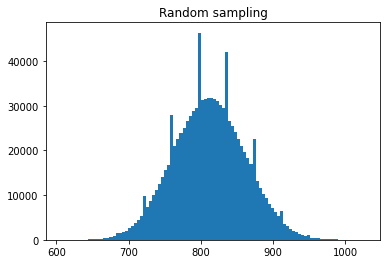

mean cost 812.021222, std 49.694606725747576


In [23]:
t0 = time.time()
n = 12

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :], flow=flow12, distance=distance12)

print(f'computation time {time.time() - t0}')

p = permutations[costs.argmin(), :]
print(f'random min cost {qap_objective_function(p, flow=flow12, distance=distance12)}, best permutation {p}')

plt.figure()
plt.title('Random sampling')
plt.hist(costs, bins=100)
plt.show()

print(f'mean cost {costs.mean()}, std {costs.std()}')

## Simulated Annealing

In [7]:
def random_neighbor(p, radius, n):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

time 74.79543328285217, min cost 578.0


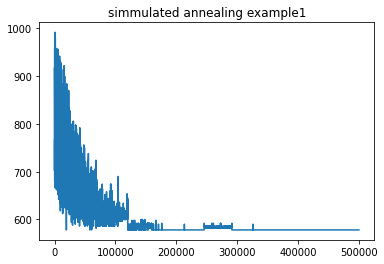

In [26]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p, flow=flow12, distance=distance12)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q, flow=flow12, distance=distance12)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(f'time {time.time() - t0}, min cost {costs.min()}')


plt.figure()
plt.title('simmulated annealing example1')
plt.plot(costs)
plt.show()


## task 1 a)

In [6]:
QAP_INSTANCE_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/nug14.dat'
flow14, distance14 = read_input(QAP_INSTANCE_URL)

Problem size: 14
Flow matrix:
 [[0. 1. 2. 3. 4. 1. 2. 3. 4. 5. 2. 3. 4. 5.]
 [1. 0. 1. 2. 3. 2. 1. 2. 3. 4. 3. 2. 3. 4.]
 [2. 1. 0. 1. 2. 3. 2. 1. 2. 3. 4. 3. 2. 3.]
 [3. 2. 1. 0. 1. 4. 3. 2. 1. 2. 5. 4. 3. 2.]
 [4. 3. 2. 1. 0. 5. 4. 3. 2. 1. 6. 5. 4. 3.]
 [1. 2. 3. 4. 5. 0. 1. 2. 3. 4. 1. 2. 3. 4.]
 [2. 1. 2. 3. 4. 1. 0. 1. 2. 3. 2. 1. 2. 3.]
 [3. 2. 1. 2. 3. 2. 1. 0. 1. 2. 3. 2. 1. 2.]
 [4. 3. 2. 1. 2. 3. 2. 1. 0. 1. 4. 3. 2. 1.]
 [5. 4. 3. 2. 1. 4. 3. 2. 1. 0. 5. 4. 3. 2.]
 [2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 0. 1. 2. 3.]
 [3. 2. 3. 4. 5. 2. 1. 2. 3. 4. 1. 0. 1. 2.]
 [4. 3. 2. 3. 4. 3. 2. 1. 2. 3. 2. 1. 0. 1.]
 [5. 4. 3. 2. 3. 4. 3. 2. 1. 2. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0. 10.  0.  5.  1.  0.  1.  2.  2.  2.  2.  0.  4.  0.]
 [10.  0.  1.  3.  2.  2.  2.  3.  2.  0.  2.  0. 10.  5.]
 [ 0.  1.  0. 10.  2.  0.  2.  5.  4.  5.  2.  2.  5.  5.]
 [ 5.  3. 10.  0.  1.  1.  5.  0.  0.  2.  1.  0.  2.  5.]
 [ 1.  2.  2.  1.  0.  3.  5.  5.  5.  1.  0.  3.  0.  5.]
 [ 0.  2.  0.  1.  3.  0.

In [6]:
# problem size 14
# parameters - number of iterations, function to control temperature, radius (kind of mutation), alpha (exp function wieght)

def SA(flow, distance, T=500000, radius=1, alpha=1.0, plot=False, debug=False):
    n = flow.shape[0]
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, flow=flow, distance=distance)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function (q, flow=flow, distance=distance)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

        if debug:
          if t % 10000 == 0 and t>0: 
            print(t, costs[t-10000:t].min())

    print(f'time {time.time() - t0}, min cost {costs.min()}')
    if plot:
        plt.figure()
        plt.title('simmulated annealing example1')
        plt.plot(costs)
        plt.show()

    return costs, p

10000 1090.0
20000 1088.0
30000 1062.0
40000 1030.0
50000 1022.0
60000 1034.0
70000 1030.0
80000 1016.0
90000 1014.0
100000 1016.0
110000 1016.0
120000 1024.0
130000 1016.0
140000 1016.0
150000 1016.0
160000 1016.0
170000 1016.0
180000 1016.0
190000 1016.0
200000 1016.0
210000 1016.0
220000 1016.0
230000 1016.0
240000 1016.0
250000 1026.0
260000 1026.0
270000 1026.0
280000 1028.0
290000 1028.0
300000 1024.0
310000 1024.0
320000 1024.0
330000 1026.0
340000 1026.0
350000 1024.0
360000 1024.0
370000 1024.0
380000 1024.0
390000 1024.0
400000 1026.0
410000 1026.0
420000 1026.0
430000 1026.0
440000 1026.0
450000 1026.0
460000 1026.0
470000 1026.0
480000 1026.0
490000 1026.0
time 40.83430886268616, min cost 1014.0


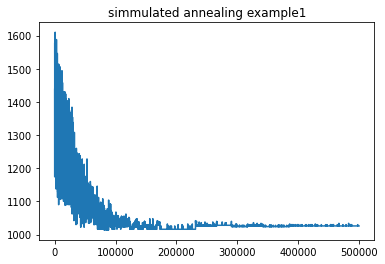

In [18]:
costs, p = SA(flow14, distance14) # computation for n=14, optimal solution

Problem size: 17
10000 1862.0
20000 1812.0
30000 1766.0
40000 1778.0
50000 1732.0
60000 1732.0
70000 1732.0
80000 1732.0
90000 1732.0
100000 1732.0
110000 1732.0
120000 1732.0
130000 1732.0
140000 1732.0
150000 1732.0
160000 1732.0
170000 1732.0
180000 1732.0
190000 1732.0
200000 1732.0
210000 1732.0
220000 1732.0
230000 1732.0
240000 1732.0
time 27.628089666366577, min cost 1732.0


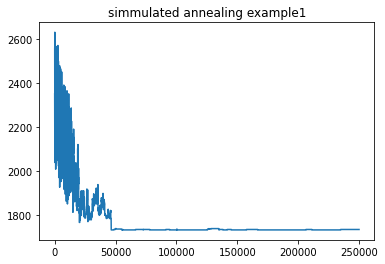

In [23]:
QAP_INSTANCE_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/nug17.dat'
flow17, distance17 = read_input(QAP_INSTANCE_URL, print_matrices=False)

# radius 3 fails, lower alpha worked
# size 17, optimal solution
costs, p = SA(flow17, distance17, T=250000, radius=2, alpha=0.8)

Problem size: 21
10000 2702.0
20000 2534.0
30000 2514.0
40000 2482.0
50000 2438.0
60000 2464.0
70000 2464.0
80000 2446.0
90000 2438.0
100000 2446.0
110000 2438.0
120000 2438.0
130000 2438.0
140000 2438.0
150000 2438.0
160000 2438.0
170000 2438.0
180000 2438.0
190000 2438.0
200000 2438.0
210000 2438.0
220000 2438.0
230000 2438.0
240000 2438.0
250000 2438.0
260000 2438.0
270000 2438.0
280000 2438.0
290000 2438.0
time 39.75813269615173, min cost 2438.0


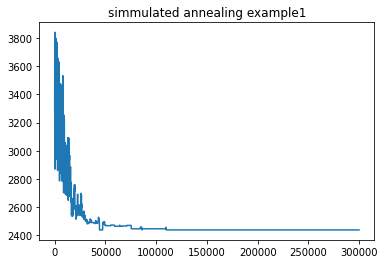

In [33]:
QAP_INSTANCE_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/nug21.dat'
flow21, distance21 = read_input(QAP_INSTANCE_URL, print_matrices=False)

# radius 3 fails, lower alpha nedded
# size 21
costs, p = SA(flow21, distance21, T=300000, radius=2, alpha=1.0)

10000 2610.0
20000 2494.0
30000 2492.0
40000 2486.0
50000 2492.0
60000 2486.0
70000 2486.0
80000 2486.0
90000 2476.0
time 22.555993795394897, min cost 2476.0


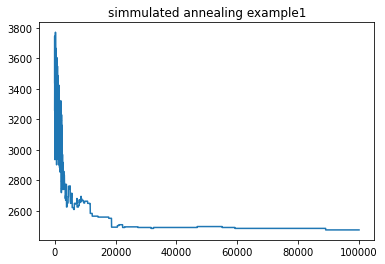

In [34]:
costs, p = SA(flow21, distance21, T=100000, radius=3, alpha=1.2)

## task 1 b)

computation time 188.12038016319275
random min cost 2742.0, best permutation [ 3 13  7 17 20 16  0 10 19  2 18  6 11  4 14 15  9  8  5 12  1]


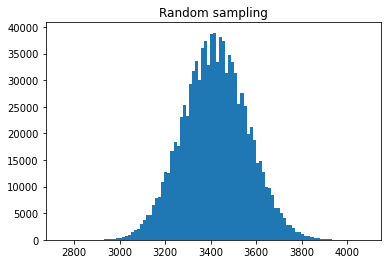

mean cost 3420.054374, std 142.75971652909692


In [47]:
t0 = time.time()
n = 21

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :], flow=flow21, distance=distance21)

print(f'computation time {time.time() - t0}')

p = permutations[costs.argmin(), :]
print(f'random min cost {qap_objective_function(p, flow=flow21, distance=distance21)}, best permutation {p}')

plt.figure()
plt.title('Random sampling')
plt.hist(costs, bins=100)
plt.show()

print(f'mean cost {costs.mean()}, std {costs.std()}')

In [19]:
from multiprocessing import Pool


def generate_hist_sa(flow, distance, iter):
  costs_array = []
  processes = 4
  with Pool(processes) as pool:
      aa = [tuple([flow21, distance21, 15000+i, 3, 1.2]) for i in range(iter)]
      processed = pool.starmap(SA, aa)

      for i in range(len(processed)):
        costs_array.append(processed[i][0].min())
        
  return costs_array


In [20]:
costs_array = generate_hist_sa(flow21, distance21, iter=1000)

time 2.987921953201294, min cost 2518.0
time 3.0517351627349854, min cost 2518.0
time 3.1378185749053955, min cost 2518.0
time 3.2926886081695557, min cost 2518.0
time 3.0251994132995605, min cost 2512.0
time 3.1857988834381104, min cost 2540.0
time 4.85406494140625, min cost 2546.0
time 4.819159746170044, min cost 2560.0
time 3.4678869247436523, min cost 2560.0
time 3.394340753555298, min cost 2478.0
time 3.19199800491333, min cost 2528.0
time 3.868381977081299, min cost 2530.0
time 3.802805185317993, min cost 2534.0
time 3.5550942420959473, min cost 2554.0
time 3.3153793811798096, min cost 2562.0
time 3.466355800628662, min cost 2530.0
time 3.1391255855560303, min cost 2512.0
time 3.161526679992676, min cost 2546.0
time 4.422957897186279, min cost 2582.0
time 4.423140525817871, min cost 2530.0
time 3.4760184288024902, min cost 2528.0
time 3.450932264328003, min cost 2506.0
time 3.48421573638916, min cost 2572.0
time 3.7572786808013916, min cost 2520.0
time 3.4579124450683594, min cos

min cost form SA is 2484.0


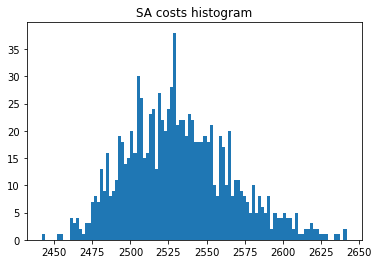

In [22]:
print(f'min cost form SA is {costs_array[-1]}')
plt.figure()
plt.title('SA costs histogram')
plt.hist(costs_array, bins=100)
plt.show()

## task 1 c
counting successes and accepted losses

In [7]:

def SA_count_succes(flow, distance, T=500000, radius=1, alpha=1.0, plot=False, debug=False):
    n = flow.shape[0]
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, flow=flow, distance=distance)
    costs = np.zeros(T)
    success = []
    losses = []
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function (q, flow=flow, distance=distance)
        if(q_cost < p_cost):
            success.append(t)
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            losses.append(t)
        costs[t] = p_cost

        if debug:
          if t % 10000 == 0 and t>0: 
            print(t, costs[t-10000:t].min())

    print(f'time {time.time() - t0}, min cost {costs.min()}')
    if plot:
        plt.figure()
        plt.title('simmulated annealing example1')
        plt.plot(costs)
        plt.show()

    return costs, p, success, losses


In [8]:

QAP_INSTANCE_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/nug17.dat'
flow17, distance17 = read_input(QAP_INSTANCE_URL, print_matrices=False)

costs, p, success, losses = SA_count_succes(flow17, distance17) # computation for n=14, optimal solution

Problem size: 17
time 113.98009586334229, min cost 1734.0


In [18]:
costs2, p2, success2, losses2 = SA_count_succes(flow17, distance17, alpha=2.0, radius=3) # computation for n=14, optimal solution

time 125.29778623580933, min cost 1734.0


In [35]:
costs3, p3, success3, losses3 = SA_count_succes(flow17, distance17, alpha=0.1, radius=3) # computation for n=14, optimal solution

time 208.25058031082153, min cost 1768.0


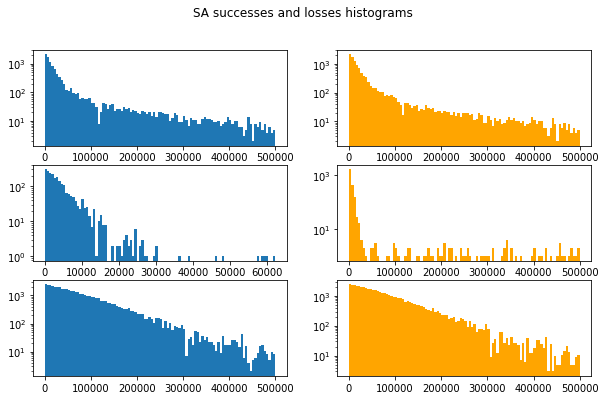

In [36]:
fig, ax = plt.subplots(3, 2, figsize=(10,6))
fig.suptitle('SA successes and losses histograms')
ax[0,0].hist(success, bins=100, log=True)
ax[1,0].hist(success2, bins=100, log=True)
ax[2,0].hist(success3, bins=100, log=True)

ax[0,1].hist(losses, bins=100, log=True, color='orange')
ax[1,1].hist(losses2, bins=100, log=True, color='orange')
ax[2,1].hist(losses3, bins=100, log=True, color='orange')


plt.show()

## task 1d

In [18]:
from scipy.spatial import distance

def SA_perm_distance(flow, distance_m, T=500000, radius=1, alpha=1.0, plot=False, debug=False):
    n = flow.shape[0]
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, flow=flow, distance=distance_m)
    costs = np.zeros(T)
    distances = []
    target = []
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function (q, flow=flow, distance=distance_m)
        if(q_cost < p_cost):
            distances.append(distance.hamming(p.tolist(), q.tolist())) # kendal tau - measurement of order - O(n^2)
            target.append(p_cost - q_cost)
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            # losses.append(distance.hamming(p, q))
        costs[t] = p_cost

        if debug:
          if t % 10000 == 0 and t>0: 
            print(t, costs[t-10000:t].min())

    print(f'time {time.time() - t0}, min cost {costs.min()}')
    if plot:
        plt.figure()
        plt.title('simmulated annealing example1')
        plt.plot(costs)
        plt.show()

    return costs, p, distances, target


In [25]:
QAP_INSTANCE_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/nug17.dat'
flow17, distance17 = read_input(QAP_INSTANCE_URL, print_matrices=False)

costs, p, distances, target = SA_perm_distance(flow17, distance17, radius=3) # computation for n=14, optimal solution

Problem size: 17
time 74.27419471740723, min cost 1750.0


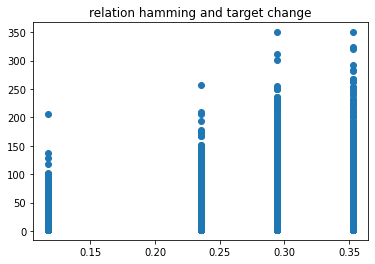

In [28]:
plt.figure()
plt.title('relation hamming and target change')
plt.scatter(distances, target)
plt.show()